# Graphiques pour la RFF

In [35]:
#importation bibliothèque
import numpy as np
import matplotlib.pyplot as plt

## Régression RFF de la fonction $f(x) = \sin 3x + 0.3\cos 5x $ avec noyau gaussien

In [36]:
#création du set de données pour RFF
n = 80                      
X = np.linspace(-3, 3, n)[:, None]   
y = f_true(X[:, 0])

#définition de la fonction cible
def f_vraie(x):
    """Target function"""
    return np.sin(3 * x) + 0.3 * np.cos(5 * x)


#échantillon test
X_test = np.linspace(-3, 3, 400)[:, None]
y_true = f_vraie(X_test[:, 0])

#transformation fourier
def rff_Z(X, omega, b):
    return np.sqrt(2 / omega.shape[0]) * np.cos(X @ omega.T + b)

#définition des paramètres
sigma = 1
lam = 1e-3
S = [20, 100, 500]

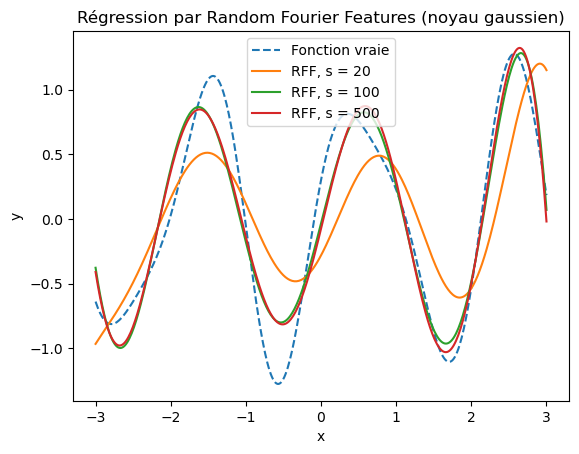

In [37]:
#représentation graphique régression RFF

plt.figure()

plt.plot(X_test[:, 0], y_true, linestyle="dashed", label="Fonction vraie")

for s in S:
    omega = np.random.normal(scale=1 / sigma, size=(s, 1))
    b = np.random.uniform(0, 2 * np.pi, size=s)
    
    Z = rff_Z(X, omega, b)
    Z_test = rff_Z(X_test, omega, b)
    
    w = np.linalg.solve(Z.T @ Z + lam * np.eye(s), Z.T @ y)
    y_pred = Z_test @ w
    
    plt.plot(X_test[:, 0], y_pred, label=f"RFF, s = {s}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par Random Fourier Features (noyau gaussien)")
plt.legend()
plt.show()
plt.close()

## Représentation de la convergence de $\mathbb{E}|\hat k(x,xp) - k(x,xp)| $ en $\frac{C}{\sqrt{s}}$

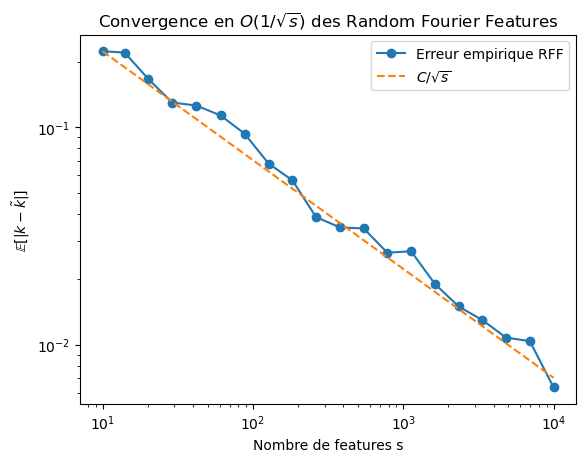

In [38]:
#représentation de la convergence 

# def noyau gaussien exact
def noyau_gaussien(x, xp, sigma):
    return np.exp(-np.linalg.norm(x - xp)**2 / (2 * sigma**2))

sigma = 1.0

#on choisit arbitrairement les deux points avec lesquels nous allons comparer le noyau gaussien et son approx
x = np.array([0.7])
xp = np.array([-1.2])

k_exact = noyau_gaussien(x, xp, sigma)

# approximation RFF 
def noyau_RFF(x, xp, s, sigma):
    omega = np.random.normal(scale=1/sigma, size=(s, 1))
    b = np.random.uniform(0, 2*np.pi, size=s)
    zx = np.sqrt(2) * np.cos(omega @ x + b)
    zxp = np.sqrt(2) * np.cos(omega @ xp + b)
    return np.mean(zx * zxp)

S = np.logspace(1, 4, 20, dtype=int) #échelle log 
n_mc = 50
erreurs = []

for s in S:
    RFF = [noyau_RFF(x, xp, s, sigma) for i in range(n_mc)]
    erreurs.append(np.mean(np.abs(np.array(RFF) - k_exact)))


theorique = erreurs[0] * np.sqrt(S[0] / S)

# graphe
plt.figure()
plt.loglog(S, erreurs, 'o-', label="Erreur empirique RFF")
plt.loglog(S, theorique, '--', label=r"$C/\sqrt{s}$")
plt.xlabel("Nombre de features s")
plt.ylabel(r"$\mathbb{E}[|k - \tilde{k}|]$")
plt.title("Convergence en $O(1/\sqrt{s})$ des Random Fourier Features")
plt.legend()
plt.show()
plt.close()